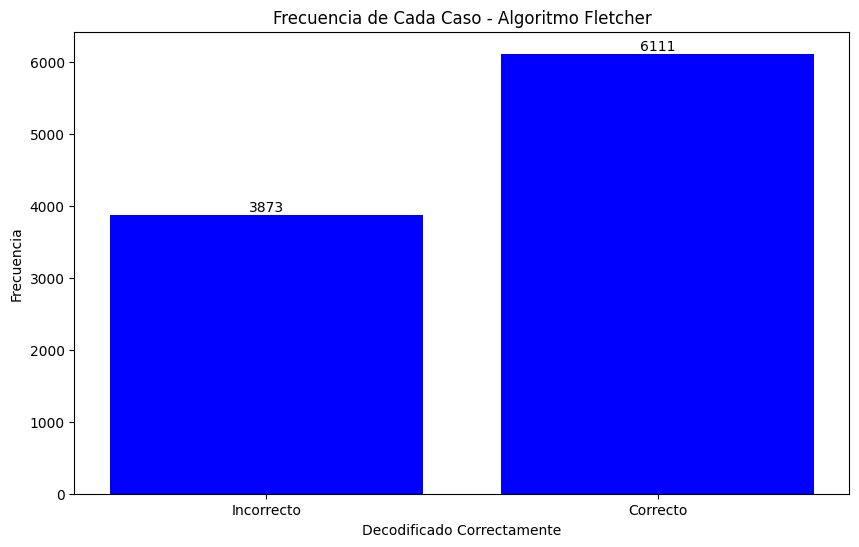

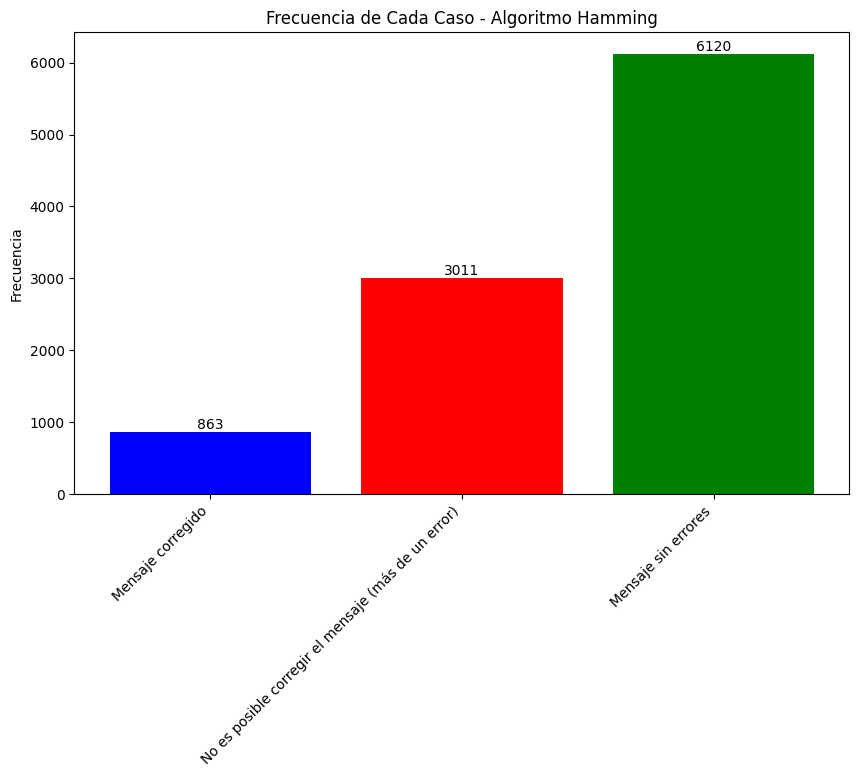

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el output
data = pd.read_csv('output.csv', header=None, names=['algoritmo', 'probabilidad', 'decodificado_correctamente', 'correccion_falsa'])

# Filtrar los datos por algoritmo
fletcher_data = data[data['algoritmo'] == 1]
hamming_data = data[data['algoritmo'] == 2]

# Contar la frecuencia de cada combinación para Fletcher
frecuencia_fletcher = fletcher_data.groupby(['decodificado_correctamente']).size().reset_index(name='frecuencia')

# Contar la frecuencia de cada combinación para Hamming
frecuencia_hamming = hamming_data.groupby(['decodificado_correctamente', 'correccion_falsa']).size().reset_index(name='frecuencia')

# Crear la gráfica de barras para Fletcher
plt.figure(figsize=(10, 6))
bars = plt.bar(frecuencia_fletcher['decodificado_correctamente'].astype(str), frecuencia_fletcher['frecuencia'], color='blue')
plt.xlabel('Decodificado Correctamente')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Cada Caso - Algoritmo Fletcher')
plt.xticks([0, 1], ['Incorrecto', 'Correcto'])

# Agregar etiquetas de frecuencia
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()

# Crear la gráfica de barras para Hamming con etiquetas descriptivas
plt.figure(figsize=(10, 6))
labels = []
bars = []
colors = []
frequencies = []
for i, row in frecuencia_hamming.iterrows():
    if row['decodificado_correctamente'] == 1:
        label = 'Mensaje sin errores'
        color = 'green'
    elif row['correccion_falsa'] == 0:
        label = 'Mensaje corregido'
        color = 'blue'
    else:
        label = 'No es posible corregir el mensaje (más de un error)'
        color = 'red'
    labels.append(label)
    frequencies.append(row['frecuencia'])
    colors.append(color)

bars = plt.bar(labels, frequencies, color=colors)

plt.ylabel('Frecuencia')
plt.title('Frecuencia de Cada Caso - Algoritmo Hamming')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de frecuencia
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()

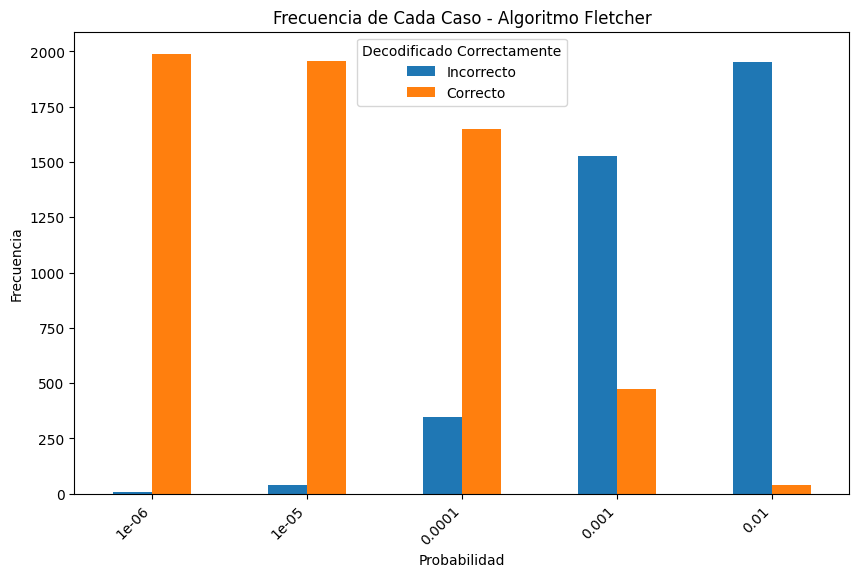

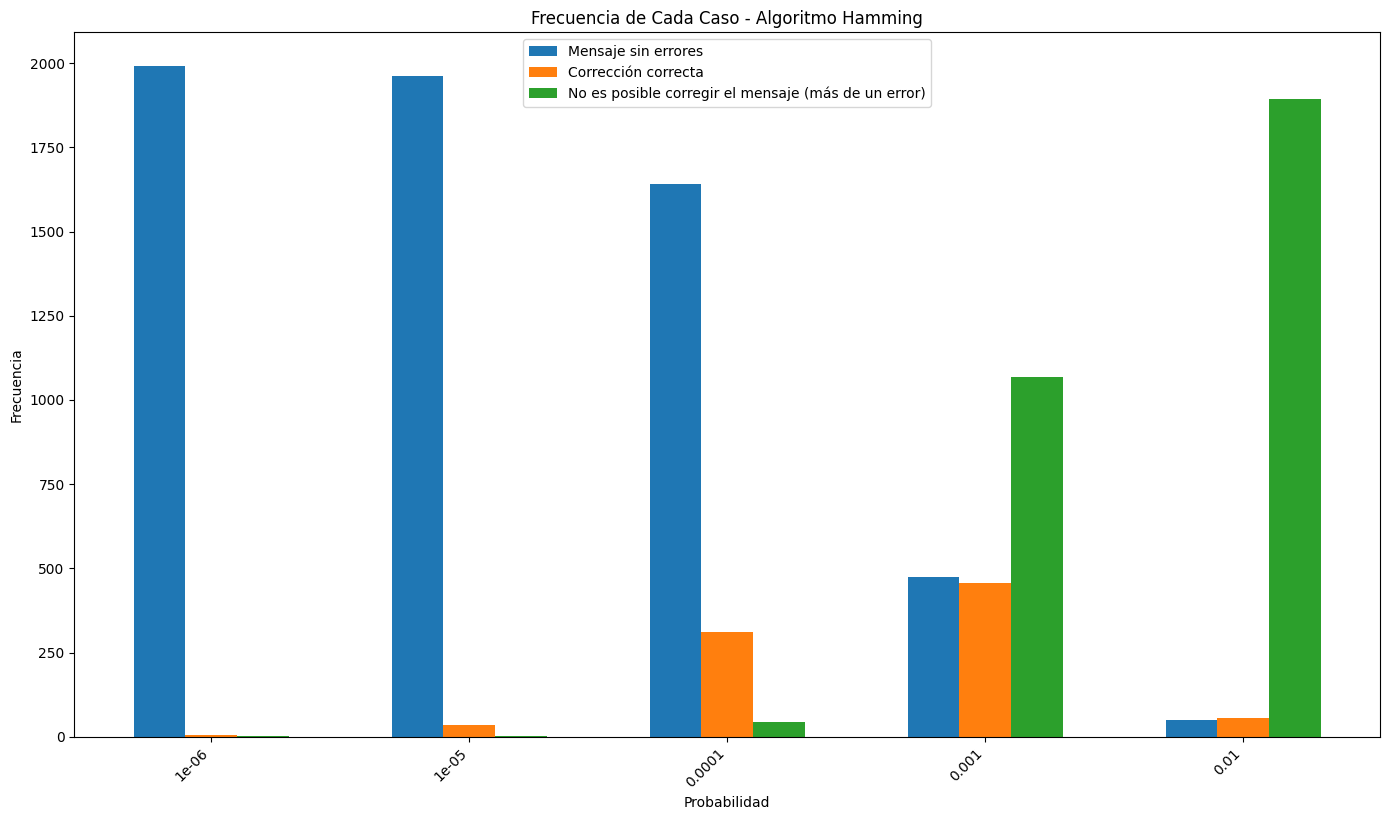

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer el archivo CSV
data = pd.read_csv('output.csv', header=None, names=['algoritmo', 'probabilidad', 'decodificado_correctamente', 'correccion_falsa'])

# Filtrar los datos por algoritmo
fletcher_data = data[data['algoritmo'] == 1]
hamming_data = data[data['algoritmo'] == 2]

# Agrupar por probabilidad y decodificado_correctamente para Fletcher
frecuencia_fletcher = fletcher_data.groupby(['probabilidad', 'decodificado_correctamente']).size().unstack(fill_value=0)

# Agrupar por probabilidad, decodificado_correctamente y correccion_falsa para Hamming
frecuencia_hamming = hamming_data.groupby(['probabilidad', 'decodificado_correctamente', 'correccion_falsa']).size().unstack(fill_value=0)

# Crear la gráfica de barras agrupadas para Fletcher
frecuencia_fletcher.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Cada Caso - Algoritmo Fletcher')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decodificado Correctamente', labels=['Incorrecto', 'Correcto'])
plt.show()

# Preparar datos para la gráfica de Hamming
labels = []
frequencies = {'Mensaje sin errores': [], 'Corrección correcta': [], 'No es posible corregir el mensaje (más de un error)': []}
probabilidades = sorted(hamming_data['probabilidad'].unique())

for probabilidad in probabilidades:
    subset = hamming_data[hamming_data['probabilidad'] == probabilidad]
    sin_errores = len(subset[(subset['decodificado_correctamente'] == 1)])
    correccion_correcta = len(subset[(subset['decodificado_correctamente'] == 0) & (subset['correccion_falsa'] == 0)])
    no_corregible = len(subset[(subset['decodificado_correctamente'] == 0) & (subset['correccion_falsa'] == 1)])
    
    frequencies['Mensaje sin errores'].append(sin_errores)
    frequencies['Corrección correcta'].append(correccion_correcta)
    frequencies['No es posible corregir el mensaje (más de un error)'].append(no_corregible)
    labels.append(probabilidad)

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width, frequencies['Mensaje sin errores'], width, label='Mensaje sin errores')
rects2 = ax.bar(x, frequencies['Corrección correcta'], width, label='Corrección correcta')
rects3 = ax.bar(x + width, frequencies['No es posible corregir el mensaje (más de un error)'], width, label='No es posible corregir el mensaje (más de un error)')

ax.set_xlabel('Probabilidad')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de Cada Caso - Algoritmo Hamming')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()